In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import matplotlib.pyplot as plt
import matplotlib

from pylab import plot,show, hist, rcParams 
rcParams['figure.figsize'] = 10, 8

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression 
from sklearn.model_selection import train_test_split, cross_val_score


%config InlineBackend.figure_format = 'svg' 
%matplotlib inline


#plt.rc("font", size=14)

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Реализация

## Часть 1

Загрузим и посмотрим наши данные

In [2]:
data = pd.read_csv('data_breast.csv')

In [4]:
data.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Посмотрим есть ли у нас пропущенные значения и нулевые

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Значения пропущенны в признаке `Unnamed: 32`, далее мы дропнем данный столбец

Рассчитаем основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [8]:
data.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


Наш таргет `diagnosis`, модель должна научитья по имеющимся признакам классифицировать злокачественное новообразование или доброкачественное

Посмотрим на распределение нашего таргета

In [9]:
data.groupby('diagnosis')['perimeter_worst'].count()

diagnosis
B    357
M    212
Name: perimeter_worst, dtype: int64

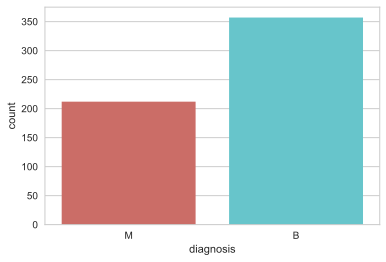

In [10]:
#Визуализируем распределение таргета
sns.countplot(x = 'diagnosis', data=data, palette='hls')
plt.show()

кол-во значений в группе таргета разбалансированно, значит будем делать Oversampling (возможно это сделает результат нашего предсказания точнее) ниже будет описанн метод баллансировки данных

In [11]:
malicious = len(data[data['diagnosis']=='M'])
benign = len(data[data['diagnosis']=='B'])
pct_of_no_sub = malicious/(malicious+benign)
print("Процент злокачественных (M) =", pct_of_no_sub*100)
pct_of_sub = benign/(malicious+benign)
print("Процент доброкачественных (B) =", pct_of_sub*100)

Процент злокачественных (M) = 37.258347978910365
Процент доброкачественных (B) = 62.741652021089635


Посмотрим на распределение каждого признака

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c42b160>,
      dtype=object)

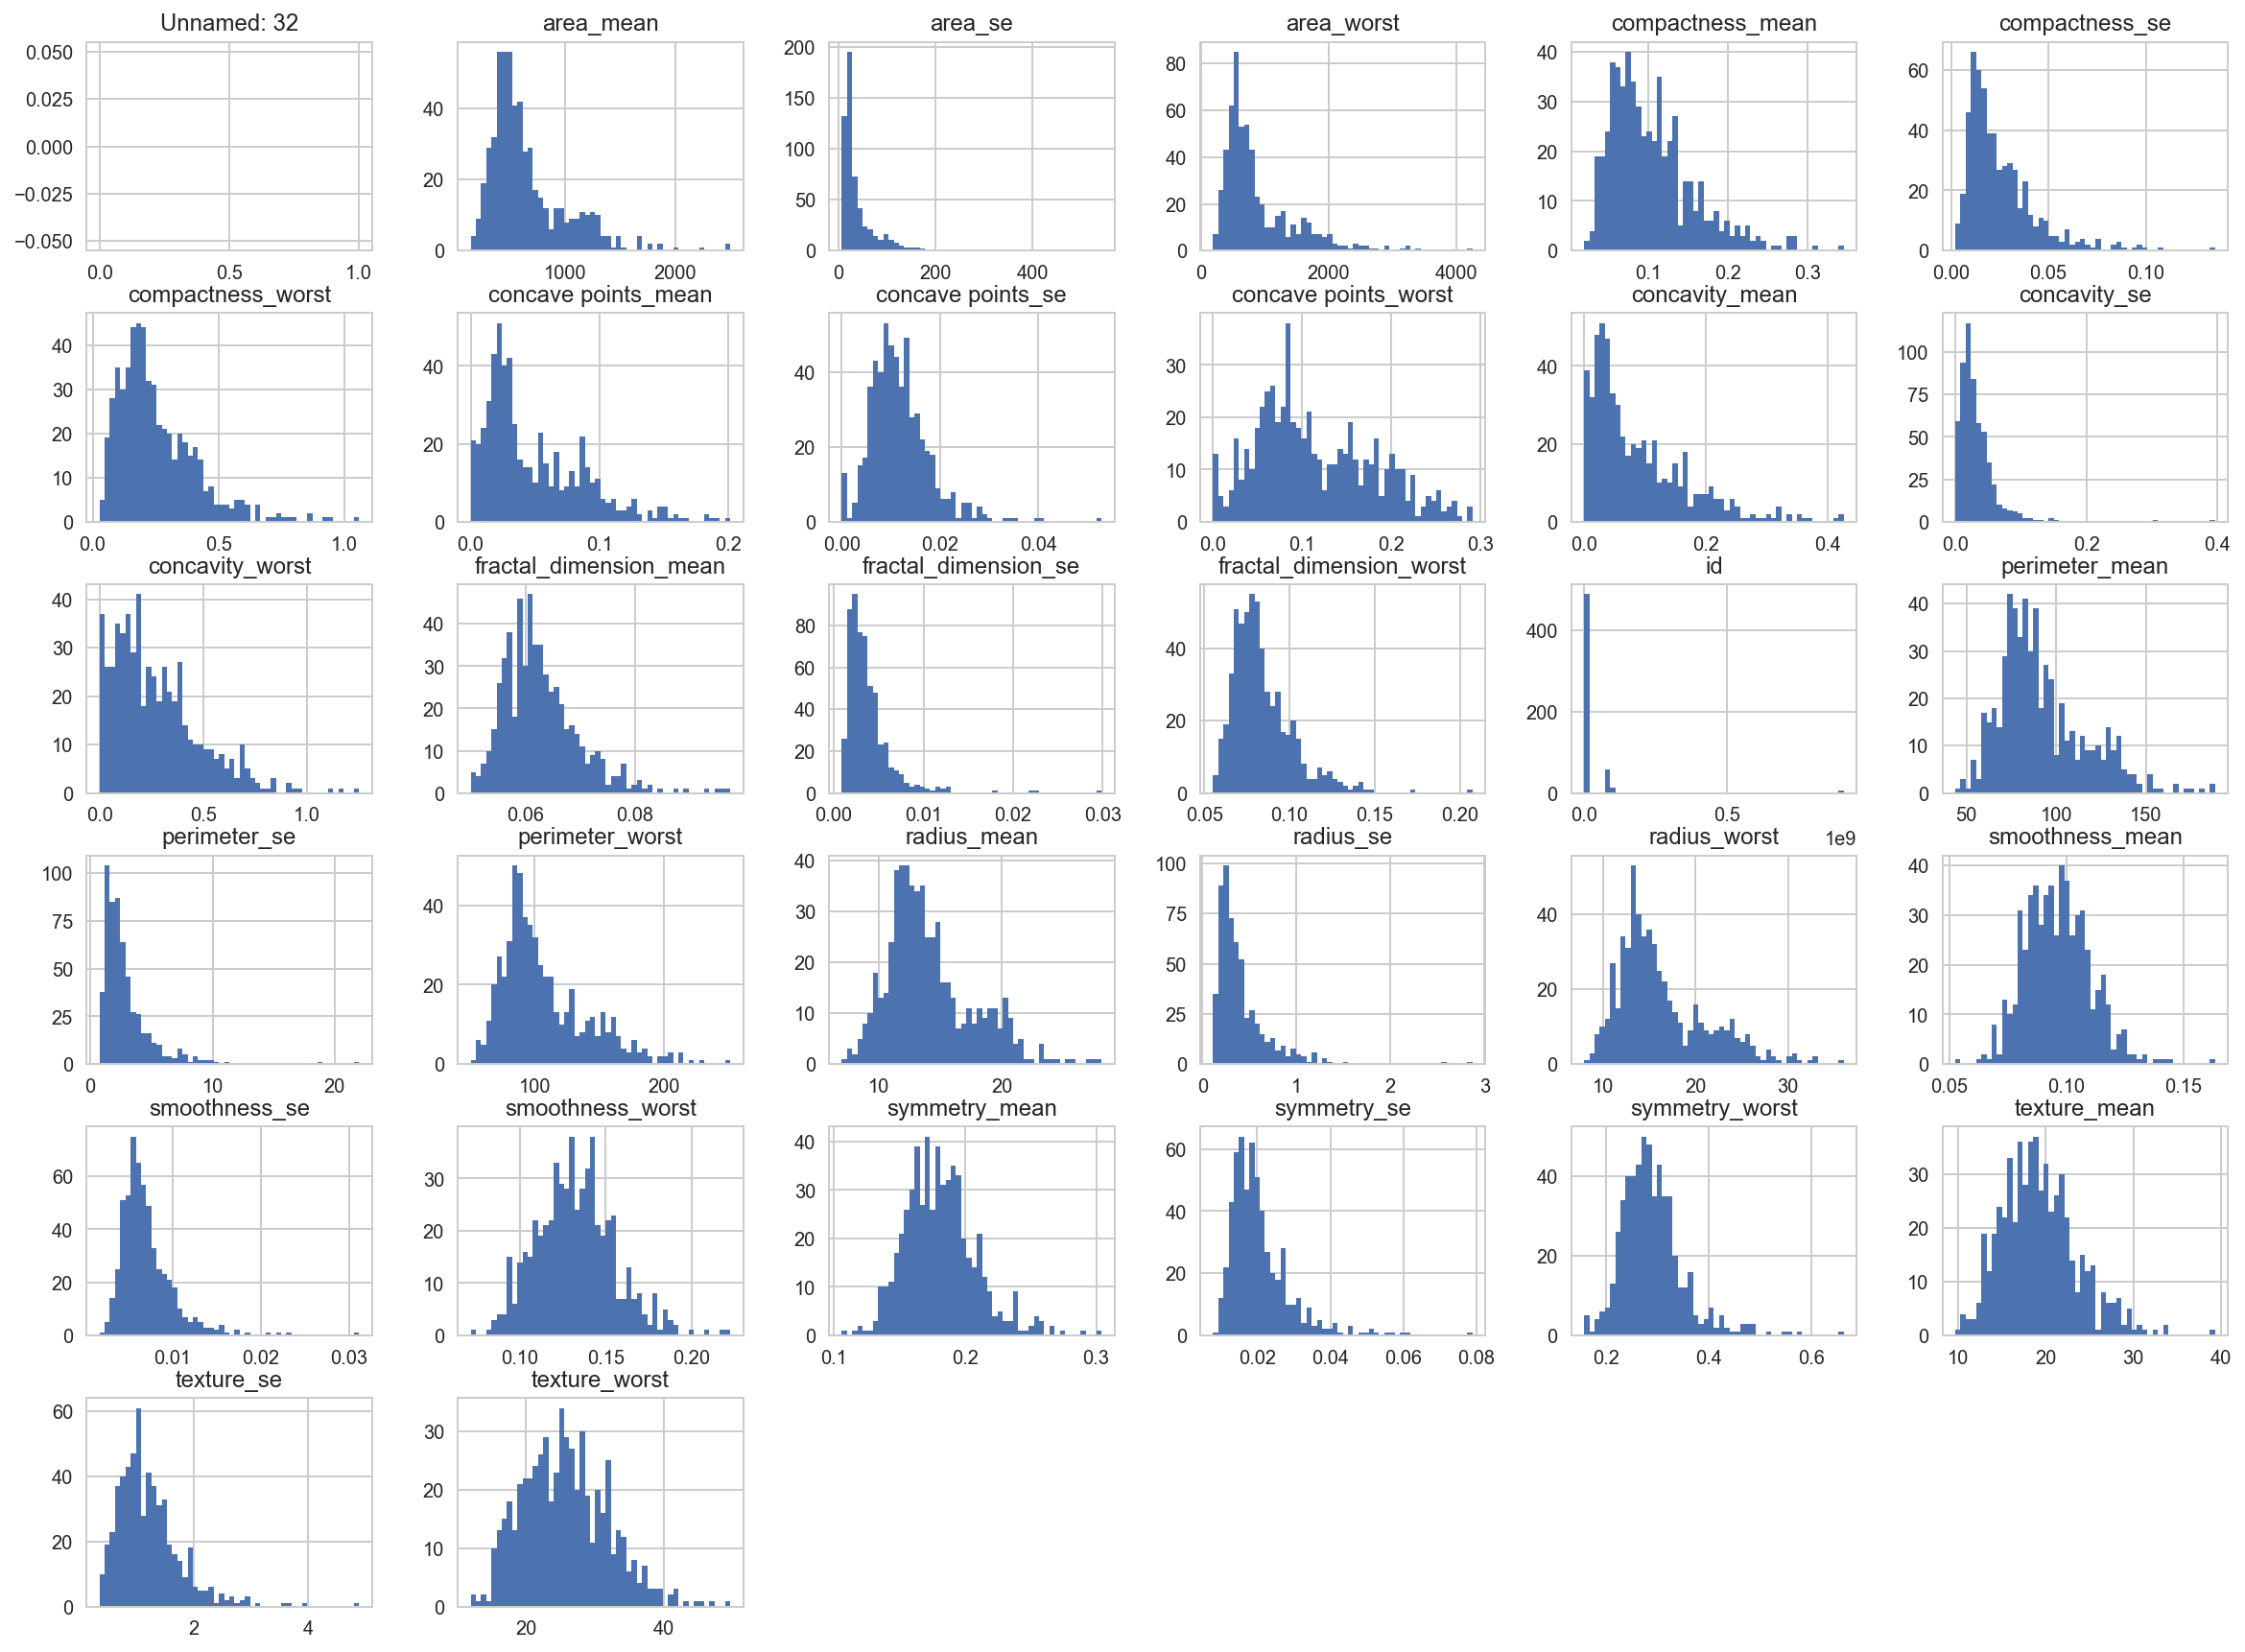

In [12]:
%config InlineBackend.figure_format = 'retina'
data.hist(bins=50, figsize=(20,15), )

Очень интересно, почти у всех признаков распределение смещенно в лево, при этом по некоторым признакам наблюдаютсяочень серьезные вылеты, к примеру по признаку `area_se` максимальное значение выброса достигает 542.2, но при этом среднее значение равно 40.3 а медиана 24.5
Близкое к нормальному распределение можно наблюдать у признаков `smoothness_worst` и `smoothnes_mean`

Рассчитаем и визуализироуем корреляционную матрицу для переменных

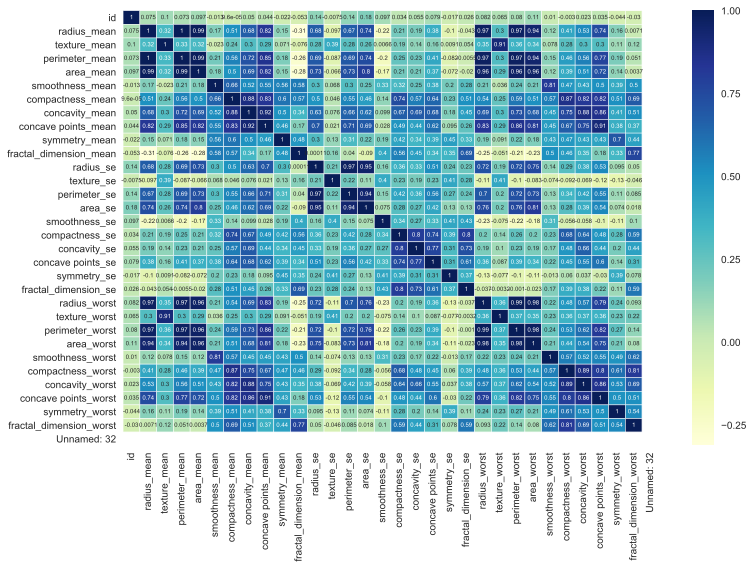

In [13]:
%config InlineBackend.figure_format = 'svg'
fig, ax = plt.subplots()
#protect our eyes возьмем размер побольше
fig.set_size_inches(12, 8)
corr = data.corr()
sns.heatmap(corr, annot=True, linewidths=.5,cmap="YlGnBu", linecolor='white', annot_kws={"size": 6},\
            xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## Выполним эксплоративный анализ

В нашем наборе данных 32 признака, для удобства разобьем все признаки на 3 части по 10 - 11 признаков.

первая группа:
- radius_mean
- texture_mean
- perimeter_mean
- area_mean
- smoothness_mean
- compactness_mean
- concavity_mean
- concave points_mean
- symmetry_mean
- fractal_dimension_mean

вторая группа:
- radius_se
- texture_se
- perimeter_se
- area_se
- smoothness_se
- compactness_se 
- concavity_se
- concave points_se
- symmetry_se
- fractal_dimension_se

третья группа
- radius_worst
- texture_worst
- perimeter_worst
- area_worst
- smoothness_worst
- compactness_worst
- concavity_worst
- concave points_worst
- symmetry_worst
- fractal_dimension_worst

поскольку я не специалист в предметной области и не могу по названию признака понять его значимость. В связи с чем я выполню эксплоративный анализ и буду визуализировать распределение признаков по диагнозу, для большей наглядности будем строить гистограмму и box plot

Ну что, начнем!

In [3]:
#для удобства сделаем новый набор данных, дропнем лишнее 
y_1 = data.diagnosis                          
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Выполним стандартизацию наших данных в данном случае выберем немного необычный метод, а вообще конечно лучше использовать `StandardScaler`, в данном случае я сделаю это как-бы руками 

In [5]:
data = x
data_n_all = (data - data.mean()) / (data.std())         
data_all = pd.concat([y_1,data_n_all.iloc[:,:29]],axis=1)
data_all.head() #нам пригодится дальше

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204
1,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675
2,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242
3,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,2.045711,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726
4,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ddc5208>,
      dtype=object)

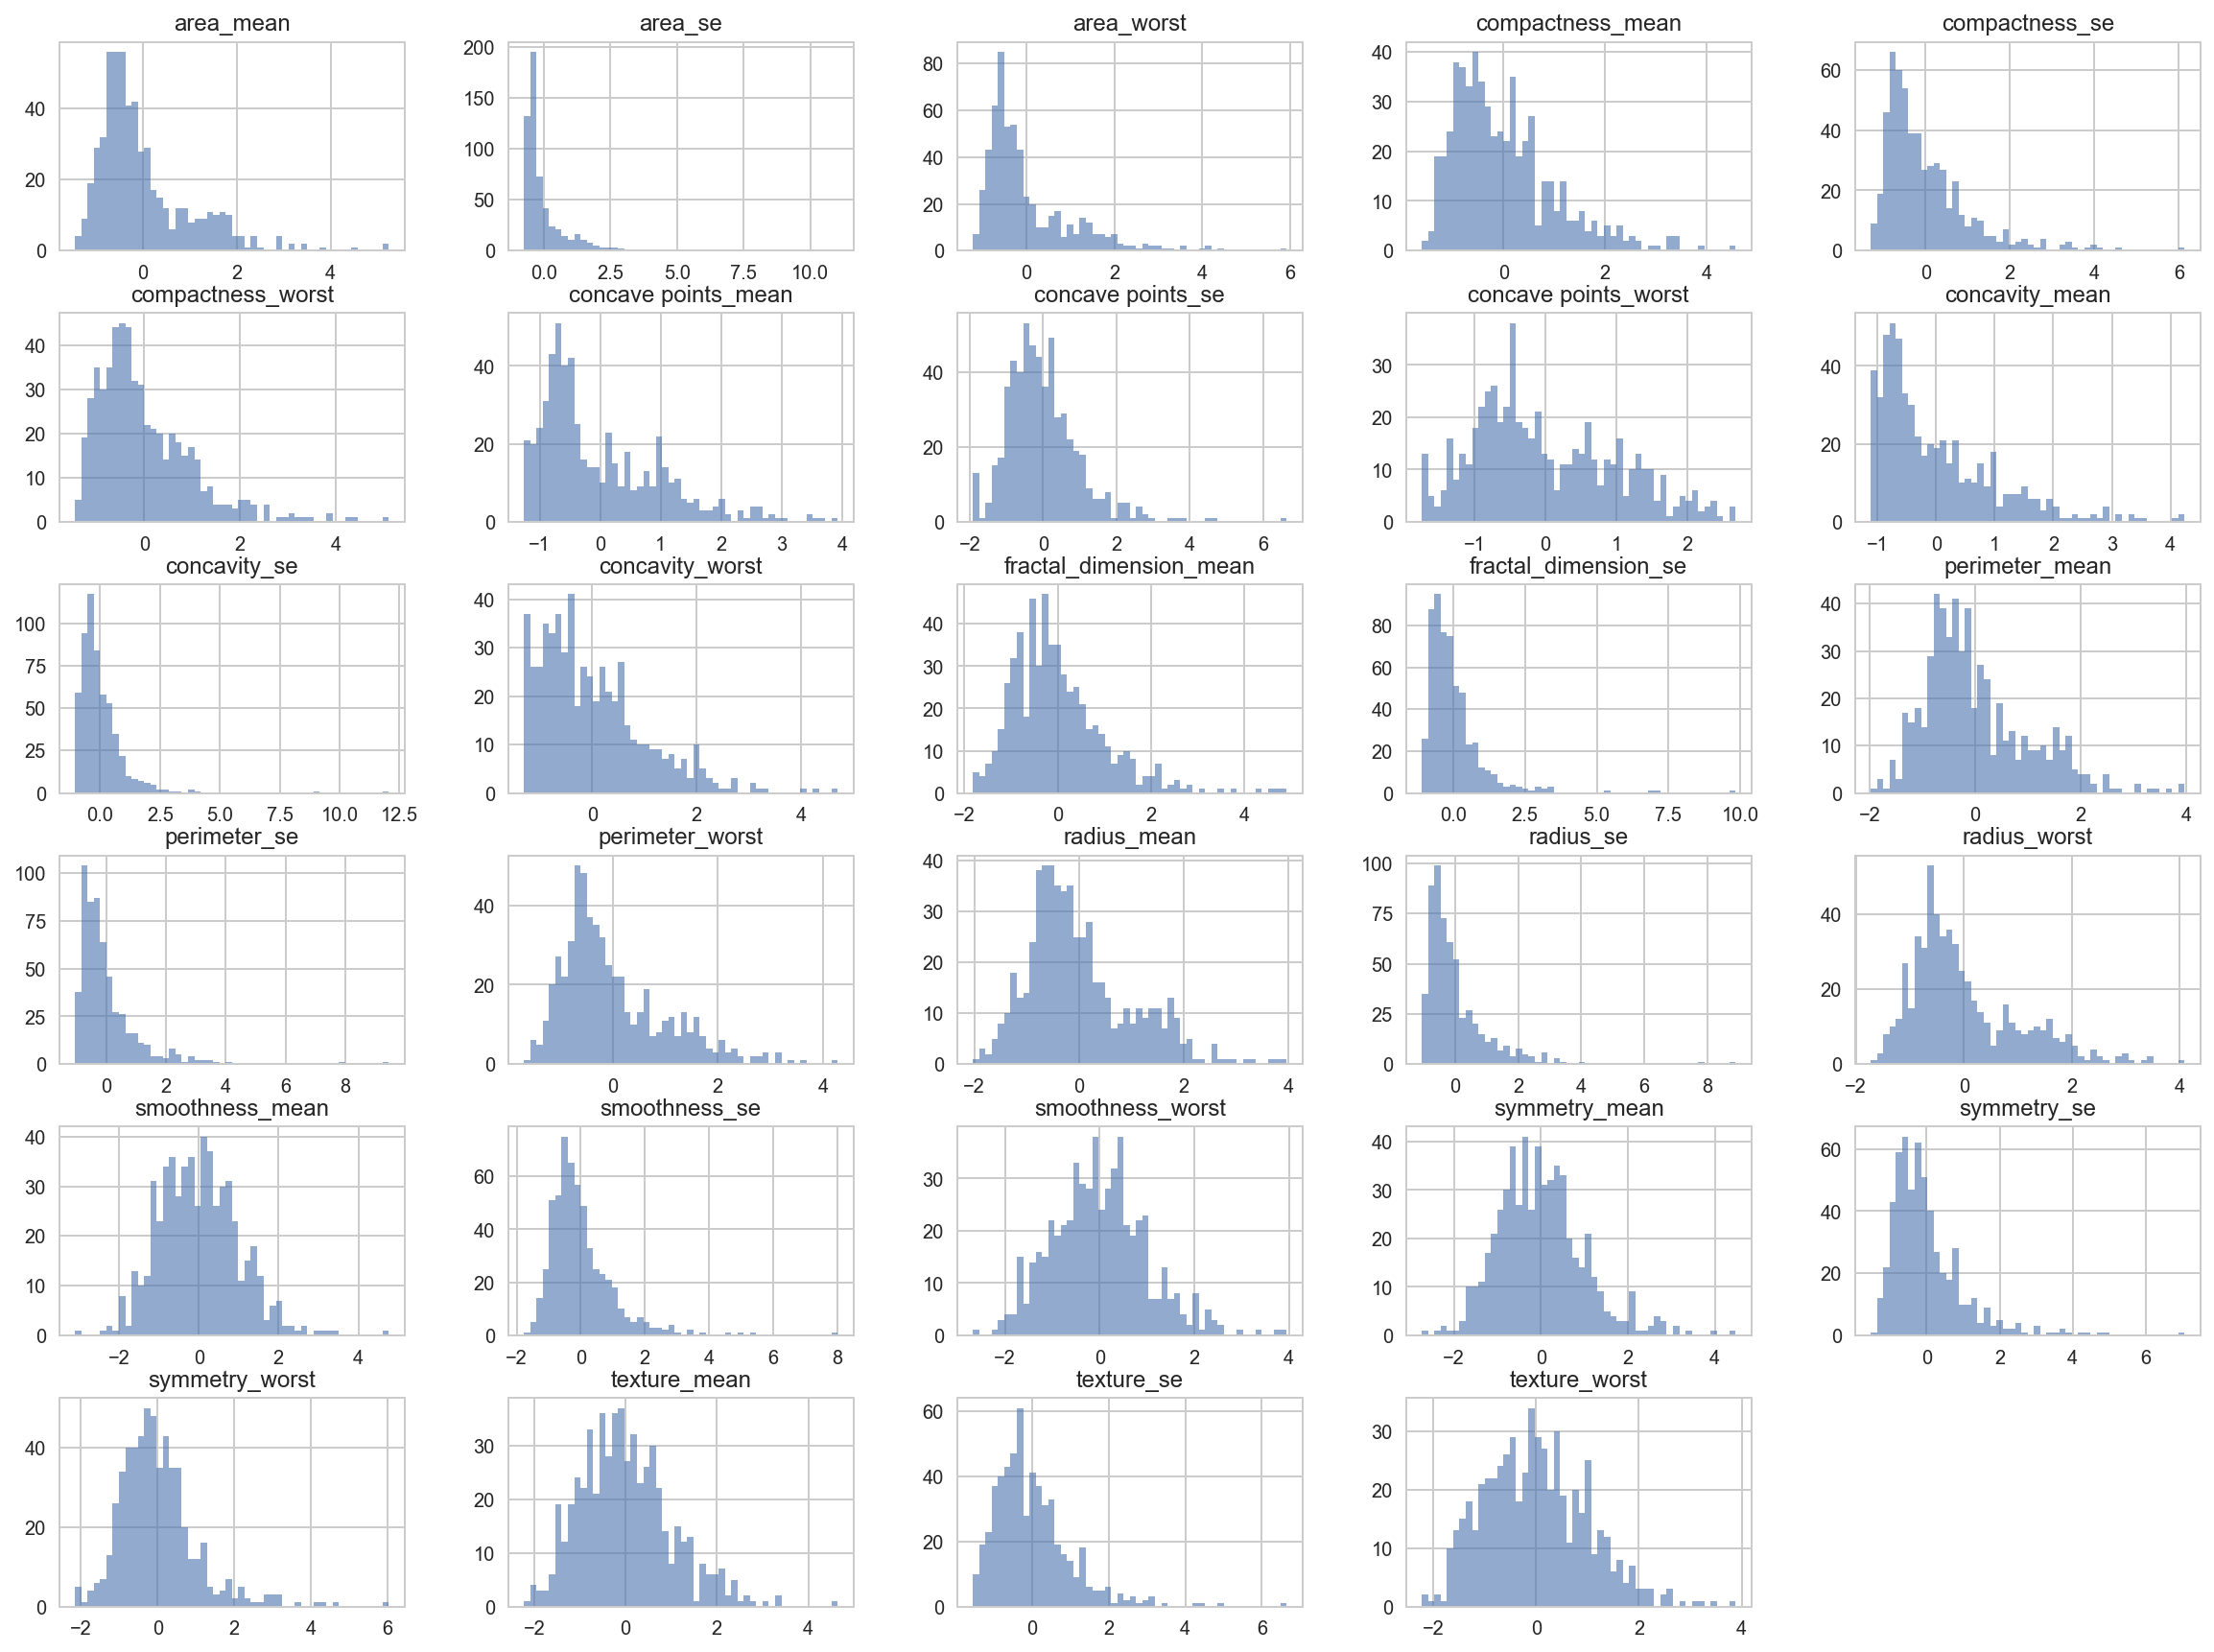

In [16]:
%config InlineBackend.figure_format = 'retina'
data_all.hist(bins=50, figsize=(20,15), alpha=0.6)

### Первая группа


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

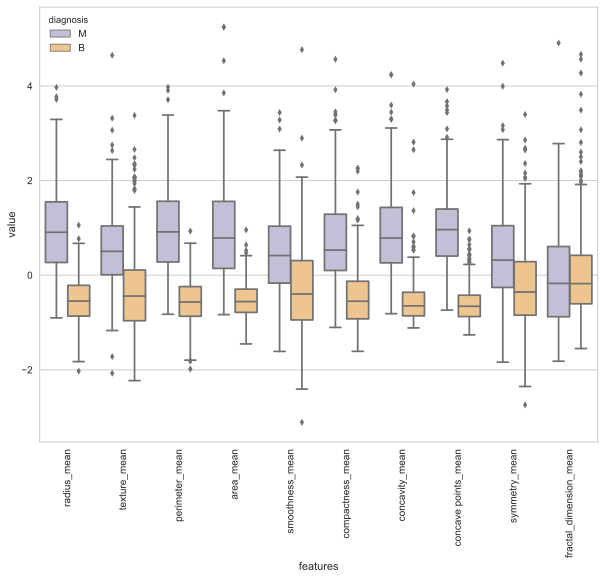

In [17]:
%config InlineBackend.figure_format = 'svg'
data = x
#отшкалируем данные для рисунка
data_n_2 = (data - data.mean()) / (data.std())            
data = pd.concat([y_1,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,8))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data, palette='PuOr_r')
plt.xticks(rotation=90)

Если посмотреть на наш график для первой группы надлюдаемых признаков то мы видим что для дальнейшего исследования интересны следующие из них:
- radius_mean (основной массив наблюдений четко разделен колличественно для диагноза B и M) 
- perimeter_mean (основной массив наблюдений четко разделен колличественно для диагноза B и M)
- concavity_mean (основной массив наблюдений четко разделен колличественно для диагноза B и M)
- concave points_mean (основной массив наблюдений четко разделен колличественно для диагноза B и M)

все остальные признаки первой группы при распределении по диагнозам начинают перекрываться между собой, соответственно при генерации новых порядковых фичей использовать данные признаки нецелесообразно

Для проверки нашей гипотизы наведем фокус на эти признаки

- radius_mean

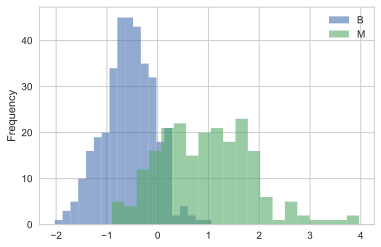

In [18]:
data_all.groupby('diagnosis')['radius_mean'].plot.hist(alpha=0.6, bins=20)#сделаем трюк для наглядности
plt.legend();

- perimeter_mean

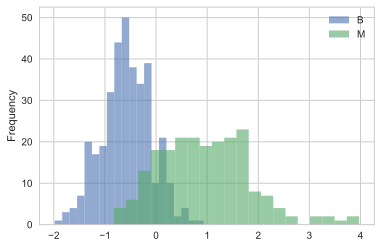

In [19]:
data_all.groupby('diagnosis')['perimeter_mean'].plot.hist(alpha=0.6, bins=20)#сделаем трюк для наглядности
plt.legend();

- area_mean

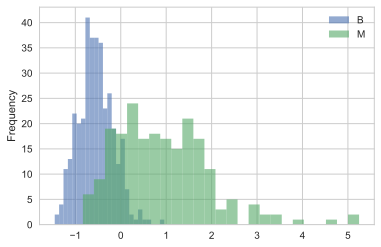

In [20]:
data_all.groupby('diagnosis')['area_mean'].plot.hist(alpha=0.6, bins=25)#сделаем трюк для наглядности
plt.legend();

- concavity_mean

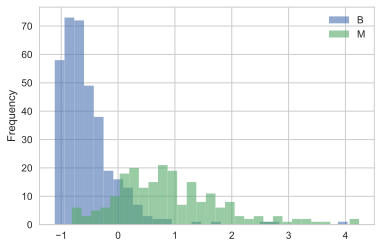

In [21]:
data_all.groupby('diagnosis')['concavity_mean'].plot.hist(alpha=0.6, bins=30)#сделаем трюк для наглядности
plt.legend();

- concave points_mean

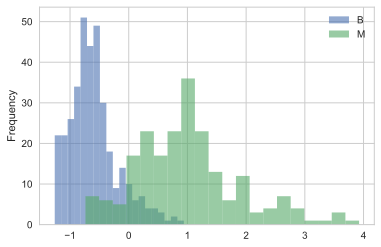

In [22]:
data_all.groupby('diagnosis')['concave points_mean'].plot.hist(alpha=0.6, bins=20)#сделаем трюк для наглядности
plt.legend();

Из данной гистаграммы отлично видно что перекрытие данных не очень большое и кол-во наблюдений в которых значение признка с диагнозом `B` совподает с значением тоже признака с диагнозом `M`, а кол-во наблюдений с обратной ситуацией не сещественно, соответственно генерировать новые фичи из данного признака модет быть очень полезно. При этом из данного распределения видно что вероятность допустить ошибку первого рода есть но это не так страшно, а вот вероятность ошибки второго рода должна быть достаточно низкая.

### Вторая группа

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

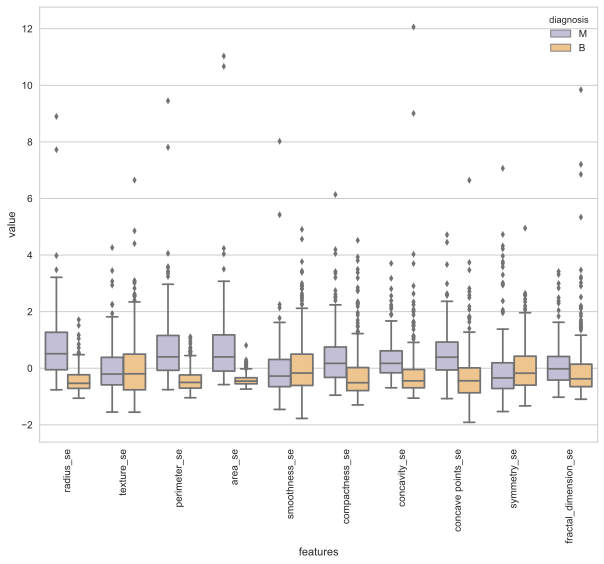

In [23]:
data = pd.concat([y_1,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,8))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data, palette='PuOr_r')
plt.xticks(rotation=90)

В данной группе я не вижу ничего интересного, идем дальше

### Третья группа

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

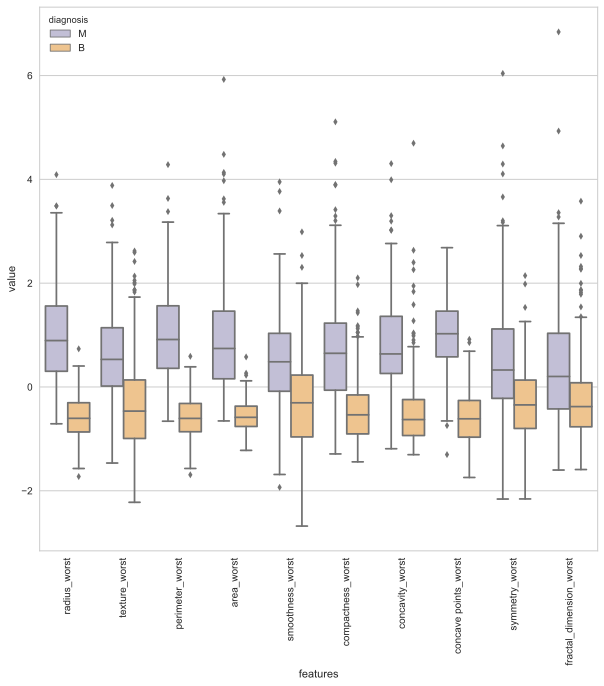

In [24]:
data = pd.concat([y_1,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data, palette='PuOr_r')
plt.xticks(rotation=90)

Для проверки нашей гипотизы наведем фокус на признаки

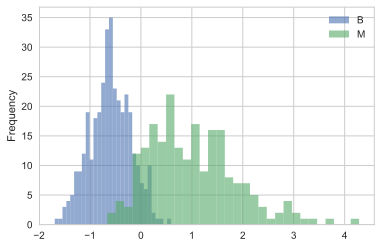

In [25]:
data_all.groupby('diagnosis')['perimeter_worst'].plot.hist(alpha=0.6, bins= 30)
plt.legend()

Из данной гистаграммы отлично видно что перекрытие данных не очень большое и кол-во наблюдений в которых значение признка с диагнозом `B` совподает с значением тоже признака с диагнозом `M`, а кол-во наблюдений с обратной ситуацией не сещественно, соответственно генерировать новые фичи из данного признака модет быть очень полезно. При этом из данного распределения видно что вероятность допустить ошибку первого рода есть но это не так страшно, а вот вероятность ошибки второго рода должна быть достаточно низкая.

### Выберем стратегию Feature Selection – генерация новых переменных. 

In [26]:
data_all.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')

Для выбранной нами стратегии генерации новых фич будем использовать метод one hot encoding, для этого напишим несколько функций() 

In [7]:
#заменим номинальные признаки diagnosis на количественные
data_all["y"] = data_all.diagnosis.replace({"M": 1, "B":0})

In [8]:
def get_one_hot(df, cols):
    """
    функция принимает на вход порядковые признаки и
    выполняет бинаризацию
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

В ходе эксполоративного анализы мы выяснили что можно выделеть новые фичи из существующих признаков. Разделим количественные признаки на групы по диапазонам значений и потом трансформируим из порядковых в бинарные

Сделаем новую фичу `radius_mean_cat`

In [9]:
def radius_mean_trf(num):
    """
   
    """
    if num < -0.95:
        return 'safe_val'
    elif -0.95 <= num < - 0.7:
        return 'sm_risk_val'
    elif - 0.7 <= num < 0:
        return 'mid_risk_val'
    elif 0 <= num < 0.15:
        return 'risk_val'
    elif 0.15 <= num:
        return 'high_risk_val'

In [10]:
data_all['radius_mean_cat'] = data_all\
                .apply(lambda row: radius_mean_trf(row.radius_mean), axis=1)

In [11]:
#посмотрим на распределение
data_all['radius_mean_cat'].value_counts()

mid_risk_val     204
high_risk_val    195
safe_val          74
sm_risk_val       65
risk_val          31
Name: radius_mean_cat, dtype: int64

In [12]:
data_all.groupby('diagnosis')['radius_mean_cat'].value_counts()

diagnosis  radius_mean_cat
B          mid_risk_val       175
           safe_val            74
           sm_risk_val         62
           high_risk_val       26
           risk_val            20
M          high_risk_val      169
           mid_risk_val        29
           risk_val            11
           sm_risk_val          3
Name: radius_mean_cat, dtype: int64

Сделаем новую фичу `perimeter_mean_cat`

In [13]:
def perimeter_mean_trf(num):
    """
    
    """
    if num < -0.95:
        return 'safe_val'
    elif -0.95 <= num < - 0:
        return 'mixt_risk_val'
    elif 0 <= num:
        return 'risk_val'

In [14]:
data_all['perimeter_mean_cat'] = data_all\
                .apply(lambda row: perimeter_mean_trf(row.perimeter_mean), axis=1)

In [15]:
#посмотрим на распределение
data_all['perimeter_mean_cat'].value_counts()

mixt_risk_val    268
risk_val         226
safe_val          75
Name: perimeter_mean_cat, dtype: int64

In [16]:
data_all.groupby('diagnosis')['perimeter_mean_cat'].value_counts()

diagnosis  perimeter_mean_cat
B          mixt_risk_val         238
           safe_val               75
           risk_val               44
M          risk_val              182
           mixt_risk_val          30
Name: perimeter_mean_cat, dtype: int64

Сделаем новую фичу `perimeter_worst_cat`

In [17]:
def perimeter_worst_trf(num):
    """
    
    """
    if num < -0.9:
        return 'safe_val'
    elif -0.9 <= num < - 0.2:
        return 'sm_risk_val'
    elif - 0.2 <= num:
        return 'risk_val'

In [18]:
data_all['perimeter_worst_cat'] = data_all\
                .apply(lambda row: perimeter_worst_trf(row.perimeter_worst), axis=1)

In [19]:
#посмотрим на распределение
data_all['perimeter_worst_cat'].value_counts()

risk_val       260
sm_risk_val    227
safe_val        82
Name: perimeter_worst_cat, dtype: int64

In [20]:
data_all.groupby('diagnosis')['perimeter_worst_cat'].value_counts()

diagnosis  perimeter_worst_cat
B          sm_risk_val            219
           safe_val                82
           risk_val                56
M          risk_val               204
           sm_risk_val              8
Name: perimeter_worst_cat, dtype: int64

Теперь применим к новым фичам наше функцию `get_one_hot`

In [21]:
data_all.shape

(569, 34)

In [22]:
data_all_full = get_one_hot(
        data_all,
        ['radius_mean_cat', 'perimeter_mean_cat', 'perimeter_worst_cat']
    )

In [23]:
data_all_full.shape

(569, 45)

In [24]:
data_all_full.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_mean_cat_mid_risk_val,radius_mean_cat_risk_val,radius_mean_cat_safe_val,radius_mean_cat_sm_risk_val,perimeter_mean_cat_mixt_risk_val,perimeter_mean_cat_risk_val,perimeter_mean_cat_safe_val,perimeter_worst_cat_risk_val,perimeter_worst_cat_safe_val,perimeter_worst_cat_sm_risk_val
0,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,0,0,0,0,0,1,0,1,0,0
1,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,0,0,0,0,0,1,0,1,0,0
2,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,0,0,0,0,0,1,0,1,0,0
3,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,0,0,0,1,1,0,0,0,0,1
4,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,0,0,0,0,0,1,0,1,0,0


In [25]:
#дропним лишнее
data_done = data_all_full.drop(
        labels=['radius_mean_cat', 'perimeter_mean_cat', 'perimeter_worst_cat', 'diagnosis'],
        axis=1
    )

In [26]:
data_done.shape

(569, 41)

У нас есть дисбалланс в данных в части кол-ва диагнозов (мажоритарный класс `B`, миноритарный `M`) это может повлиять на обучение, чтобы решить эту проблемму увеличим кол-во обьектов в миноритарном классе (Oversempling), чтобы не просто дублировать обьекты мы применим алгоритм `SMOTE`

In [27]:
X = data_done.loc[:, data_done.columns != 'y']
y = data_done.loc[:, data_done.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  498
Number of no subscription in oversampled data 249
Number of subscription 249
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [47]:
#набор данных для проверки результатов на других моделях
X_train_ver, X_test_ver, y_train_ver, y_test_ver = X_train, X_test, y_train, y_test

In [171]:
print(data_done.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'y', 'radius_mean_cat_high_risk_val',
       'radius_mean_cat_mid_risk_val', 'radius_mean_cat_risk_val',
       'radius_mean_cat_safe_val', 'radius_mean_cat_sm_risk_val',
       'perimeter_mean_cat_mixt_risk_val', 'perimeter_mean_cat_risk_val',
       'perimeter_mean_cat_safe_val', 'perimeter_worst_cat_risk_val',
       'perimeter_worst_cat_safe_val', 'perimeter_worst_cat_sm_risk_val'],
      dtype='object')


### Logistic Regression

Для решения нашей задачи классификации будем использовать логистическую регрессию.
Отберем фичи для обучения, сократим размерность с помощью метода RFE, данный метод будет постепенно переберать фичи и исключать фичи с наихудшеми параметрами

In [172]:
data_final_vars=data_done.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False  True False
  True  True False False False False False  True  True  True False  True
 False False  True  True False False False False False False False False
 False False False  True]
[21  9 18 12 29 19  5  8 17 20  1 30  1  1 22  7 26 14 16  1  1  1  6  1
  2 31  1  1 10 28  3 15 24 23 11 13 25  4 27  1]


В резульате у нас есть 10 фичей, посмотрим как наша модель будет перформаить 

In [173]:
cols=['radius_se', 'perimeter_se', 'area_se',  'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst',
      'concavity_worst', 'concave points_worst', 'perimeter_worst_cat_sm_risk_val'
     ]

In [174]:
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.045957
         Iterations 12
                                 Results: Logit
Model:                     Logit                 No. Iterations:        12.0000 
Dependent Variable:        y                     Pseudo R-squared:      0.934   
Date:                      2018-11-12 11:14      AIC:                   67.7734 
No. Observations:          498                   BIC:                   114.0900
Df Model:                  10                    Log-Likelihood:        -22.887 
Df Residuals:              487                   LL-Null:               -345.19 
Converged:                 1.0000                Scale:                 1.0000  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
--------------------------------------------------------------------------------
radius_se                        5.6344

Из этих 10 признаков P>0.05 всего у трех признаков `fractal_dimension_se`, `texture_worst`, `concave points_worst`

In [175]:
cols1=['fractal_dimension_se', 'texture_worst', 'concave points_worst']

In [176]:
X=os_data_X[cols1]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.191789
         Iterations 9
                           Results: Logit
Model:                 Logit             No. Iterations:    9.0000  
Dependent Variable:    y                 Pseudo R-squared:  0.723   
Date:                  2018-11-12 11:14  AIC:               197.0221
No. Observations:      498               BIC:               209.6539
Df Model:              2                 Log-Likelihood:    -95.511 
Df Residuals:          495               LL-Null:           -345.19 
Converged:             1.0000            Scale:             1.0000  
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
fractal_dimension_se -0.4988   0.2366 -2.1081 0.0350 -0.9626 -0.0351
texture_worst         0.9812   0.2105  4.6624 0.0000  0.5688  1.3937
concave points_worst  4.5463

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Посмотрим результат на обучющей выборке

In [178]:
y_pred_1 = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.94


In [179]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_1)
print(confusion_matrix)

[[162  10]
 [ 12 164]]


In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_1))

             precision    recall  f1-score   support

          0       0.93      0.94      0.94       172
          1       0.94      0.93      0.94       176

avg / total       0.94      0.94      0.94       348



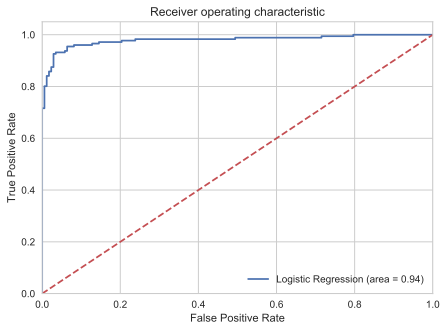

In [181]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

matplotlib.rcParams['figure.figsize'] = (7.0, 5.0)
logit_roc_auc_tr = roc_auc_score(y_train, logreg.predict(X_train))
fpr_tr, tpr_tr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr_tr, tpr_tr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_tr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Посмотрим результат на тестовой выборке

In [182]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [183]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[69  8]
 [ 2 71]]


Посмотрим на показатели на тесте

In [184]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.90      0.93        77
          1       0.90      0.97      0.93        73

avg / total       0.94      0.93      0.93       150



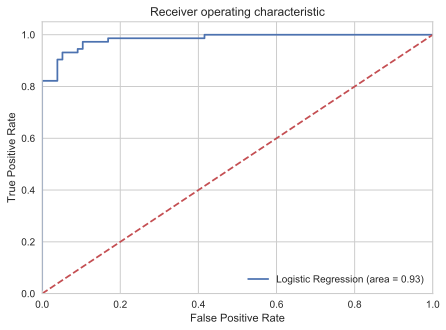

In [185]:
matplotlib.rcParams['figure.figsize'] = (7.0, 5.0)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Посмотрим на AUC на тесте и на трейне

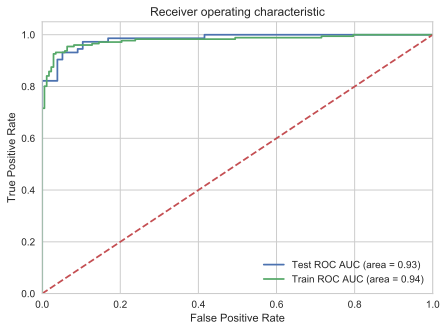

In [186]:
matplotlib.rcParams['figure.figsize'] = (7.0, 5.0)

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
logit_roc_auc_t = roc_auc_score(y_train, logreg.predict(X_train))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Test ROC AUC (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr1, tpr1, label='Train ROC AUC (area = %0.2f)' % logit_roc_auc_t)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

#### Теперь сделаем что-то необычное, посмотрим как таже модель будет работать на всех фичах которые у нас есть

In [187]:
y_pred_staff = logreg_staff.predict(X_train_ver)
print('Accuracy of logistic regression classifier on test set: {:.2f}'\
                                                          .format(logreg_staff.score(X_train_ver, y_train_ver)))

Accuracy of logistic regression classifier on test set: 0.99


In [188]:
y_pred = logreg_staff.predict(X_test_ver)
print('Accuracy of logistic regression classifier on test set: {:.2f}'\
                                                              .format(logreg_staff.score(X_test_ver, y_test_ver)))

Accuracy of logistic regression classifier on test set: 0.96


Получилось очень странновозможно что-то пошло не так, но результат на наборе данных на котором не выполнялся отбор фич, а использовались для обучения все фичи, результат получился выше чем на наборе данных где фичи были отобраны с помощью метода RFE, не знаю почему так вышло

## Проверим наши результаты полученные на моделе logreg/logreg_staff
Выполним кросс-валидацию данных с использованием подхода K-fold (n_folds=10) *будем использовать данные со всеми фичами

In [192]:
cross_val_score(logreg_staff, X_train_ver, y_train_ver, cv=10)

array([1.   , 1.   , 0.975, 0.95 , 0.975, 0.925, 0.975, 1.   , 1.   ,
       1.   ])

In [194]:
np.mean(cross_val_score(logreg_staff, X_train_ver, y_train_ver, cv=10))

0.9800000000000001

Мы видим высокую вариативность результатов на каждом кусочке (от 0.92 до 1), видимо моель переобучается и когда мы в передаем в нее новые данные она начинает терять точность

Выполним кросс-валидацию данных с использованием подхода K-fold (n_folds=10) *будем использовать данные с отобранными фичами

In [195]:
cross_val_score(logreg, X_train, y_train, cv=10)

array([0.88888889, 0.97222222, 0.94285714, 0.94285714, 0.94285714,
       0.97142857, 1.        , 0.85294118, 0.91176471, 0.94117647])

In [196]:
np.mean(cross_val_score(logreg, X_train, y_train, cv=10))

0.9366993464052287

Мы видим высокую вариативность результатов на каждом кусочке (от 0.88 до 0.97), видимо моель переобучается и когда мы в передаем в нее новые данные она начинает терять точность

## Часть 2 проверим наши данные еще на нескольких моделях (разных алгоритмах)

In [4]:
data["diagnosis"] = data.diagnosis.replace({"M": 1, "B":0})

In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
X = data
y = data['diagnosis']

In [9]:
del X['diagnosis']

In [13]:
del X['Unnamed: 32']

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [14]:
model.fit( X, y )
predictions = model.predict_proba( X )

In [18]:
predictions[:5]

array([[0.34264682, 0.65735318],
       [0.33997367, 0.66002633],
       [0.37913049, 0.62086951],
       [0.47505991, 0.52494009],
       [0.38574102, 0.61425898]])

In [19]:
cross_val_score(model, X, y, cv=10)

array([0.39655172, 0.89655172, 0.36842105, 0.92982456, 0.36842105,
       0.36842105, 0.36842105, 0.89285714, 0.625     , 0.375     ])

In [16]:
for i in zip( predictions[:, 1], y ):
    print(i)

(0.6573531767574493, 1)
(0.6600263340025005, 1)
(0.6208695103669641, 1)
(0.5249400902197547, 1)
(0.614258983745963, 1)
(0.5615072621783862, 1)
(0.6316218706196592, 1)
(0.5521042842121315, 1)
(0.5622880913314271, 1)
(0.5368378966890023, 1)
(0.5963615756554532, 1)
(0.5839534116199353, 1)
(0.6160213741757997, 1)
(0.5777292215240685, 1)
(0.5382160926914015, 1)
(0.5568793376628739, 1)
(0.5930194373824244, 1)
(0.5853403115907273, 1)
(0.6856005588352337, 1)
(0.5594712767753875, 0)
(0.5528397068161585, 0)
(0.5255563171904234, 0)
(0.5809462907818147, 1)
(0.7011337584994162, 1)
(0.6671427398528179, 1)
(0.6197387884058125, 1)
(0.5757823759065096, 1)
(0.6199485116958312, 1)
(0.6026875486259987, 1)
(0.6051508919543152, 1)
(0.6369990003179395, 1)
(0.5706614493145423, 1)
(0.5895276067715071, 1)
(0.6474889341679102, 1)
(0.6038801158845687, 1)
(0.6032264532553843, 1)
(0.5689919074485233, 1)
(0.5492421624967754, 0)
(0.5642173557188317, 1)
(0.5632606363222252, 1)
(0.5665945627670914, 1)
(0.54345802347778

### Наивный Байес

Протестируем данную модель на наборе данных с отобранными фичами 

In [99]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
print(model)

expected = y_train
predicted = model.predict(X_train)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None)
             precision    recall  f1-score   support

          0       0.94      0.94      0.94       172
          1       0.94      0.94      0.94       176

avg / total       0.94      0.94      0.94       348

[[162  10]
 [ 11 165]]


In [100]:
model = GaussianNB()
model.fit(X_test, y_test)
print(model)

expected = y_test
predicted = model.predict(X_test)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None)
             precision    recall  f1-score   support

          0       0.92      0.91      0.92        77
          1       0.91      0.92      0.91        73

avg / total       0.91      0.91      0.91       150

[[70  7]
 [ 6 67]]


Теперь посмотрим на результат на наборе данных со всеми фичами

In [102]:
model = GaussianNB()
model.fit(X_train_ver, y_train_ver)
print(model)

expected = y_train_ver
predicted = model.predict(X_train_ver)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None)
             precision    recall  f1-score   support

          0       0.98      0.86      0.92       249
          1       0.81      0.97      0.88       149

avg / total       0.92      0.90      0.91       398

[[215  34]
 [  4 145]]


In [103]:
model = GaussianNB()
model.fit(X_test_ver, y_test_ver)
print(model)

expected = y_test_ver
predicted = model.predict(X_test_ver)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None)
             precision    recall  f1-score   support

          0       1.00      0.82      0.90       108
          1       0.77      1.00      0.87        63

avg / total       0.91      0.89      0.89       171

[[89 19]
 [ 0 63]]


Очень интересный результат получился, результаты на тесте и трейне с полным набором признаков и с отобранными признаками очень близкие, спред между значениями для набора данных с полным набором фичей вообще равен 1

### K-ближайших соседей

Протестируем данную модель на наборе данных с отобранными фичами 

In [112]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
print(model1)

expected = y_train
predicted = model1.predict(X_train)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       0.96      0.95      0.96       172
          1       0.96      0.97      0.96       176

avg / total       0.96      0.96      0.96       348

[[164   8]
 [  6 170]]


In [113]:
model1 = KNeighborsClassifier()
model1.fit(X_test, y_test)
print(model1)

expected = y_test
predicted = model1.predict(X_test)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       0.96      0.94      0.95        77
          1       0.93      0.96      0.95        73

avg / total       0.95      0.95      0.95       150

[[72  5]
 [ 3 70]]


Теперь посмотрим на результат на наборе данных со всеми фичами

In [114]:
model2 = KNeighborsClassifier()
model2.fit(X_train_ver, y_train_ver)
print(model2)

expected = y_train_ver
predicted = model2.predict(X_train_ver)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       249
          1       0.99      0.95      0.97       149

avg / total       0.98      0.98      0.98       398

[[247   2]
 [  7 142]]


In [115]:
model2 = KNeighborsClassifier()
model2.fit(X_test_ver, y_test_ver)
print(model2)

expected = y_test_ver
predicted = model2.predict(X_test_ver)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       108
          1       0.98      0.95      0.97        63

avg / total       0.98      0.98      0.98       171

[[107   1]
 [  3  60]]


Очень странный результат, думаю модеь перобучилась

### Деревья решений

Протестируем данную модель на наборе данных с отобранными фичами 

In [111]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)

expected = y_train
predicted = model.predict(X_train)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       172
          1       1.00      1.00      1.00       176

avg / total       1.00      1.00      1.00       348

[[172   0]
 [  0 176]]


In [70]:
model = DecisionTreeClassifier()
model.fit(X_test, y_test)
print(model)

expected = y_test
predicted = model.predict(X_test)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        77
          1       1.00      1.00      1.00        73

avg / total       1.00      1.00      1.00       150

[[77  0]
 [ 0 73]]


Теперь посмотрим на результат на наборе данных со всеми фичами

In [116]:
model = DecisionTreeClassifier()
model.fit(X_train_ver, y_train_ver)
print(model)

expected = y_train_ver
predicted = model.predict(X_train_ver)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       249
          1       1.00      1.00      1.00       149

avg / total       1.00      1.00      1.00       398

[[249   0]
 [  0 149]]


In [117]:
model = DecisionTreeClassifier()
model.fit(X_test_ver, y_test_ver)
print(model)

expected = y_test_ver
predicted = model.predict(X_test_ver)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       108
          1       1.00      1.00      1.00        63

avg / total       1.00      1.00      1.00       171

[[108   0]
 [  0  63]]


Даже нечего написать, насчет результата

### Метод опорных векторов

Протестируем данную модель на наборе данных с отобранными фичами

In [118]:
from sklearn import metrics
from sklearn.svm import SVC
# fit a SVM model to the data
model = SVC()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_train
predicted = model.predict(X_train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       172
          1       0.95      0.95      0.95       176

avg / total       0.95      0.95      0.95       348

[[164   8]
 [  8 168]]


In [119]:
model = SVC()
model.fit(X_test, y_test)
print(model)

expected = y_test
predicted = model.predict(X_test)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          0       0.95      0.95      0.95        77
          1       0.95      0.95      0.95        73

avg / total       0.95      0.95      0.95       150

[[73  4]
 [ 4 69]]


Теперь посмотрим на результат на наборе данных со всеми фичами

In [120]:
model = SVC()
model.fit(X_train_ver, y_train_ver)
print(model)

expected = y_train_ver
predicted = model.predict(X_train_ver)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       249
          1       0.99      0.97      0.98       149

avg / total       0.99      0.99      0.99       398

[[248   1]
 [  4 145]]


In [121]:
model = SVC()
model.fit(X_test_ver, y_test_ver)
print(model)

expected = y_test_ver
predicted = model.predict(X_test_ver)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99       108
          1       1.00      0.95      0.98        63

avg / total       0.98      0.98      0.98       171

[[108   0]
 [  3  60]]


## Общий вывод по курсовой работе

Модель в основе которой используется алгоритм `SVM` показал максимальная точность (немного смущает спред между трейном и тестом), при этом что самое интересное результаты на наборе данных с отобранными фичами на многих моделях был хуже чем результат на наборе данных с начальными фичами + сгенерированными новыми фичами. 
Модель на основе линейной регрессии судя по разбросу результатов на кросс - валидации, переобучается.